In [83]:
!pip install quandl
!pip install yfinance
!pip install pandas
!pip install matplotlib


/bin/bash: line 1: Pip: command not found


In [87]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2024-07-20 20:19:15--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-20 20:19:15--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-20 20:19:15--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

In [47]:
import quandl
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [88]:
import numpy as np
import datetime
import yfinance as yf
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import talib as tb

In [54]:
df1=yf.download('CRWD', start='2024-01-01',end='2024-07-19')
df1

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,251.470001,252.289993,243.029999,246.889999,246.889999,3756800
2024-01-03,240.320007,248.830994,238.610001,244.360001,244.360001,3157600
2024-01-04,246.000000,247.610001,243.639999,245.649994,245.649994,2103000
2024-01-05,245.000000,249.479996,244.649994,247.460007,247.460007,2405900
2024-01-08,251.899994,261.639008,251.559998,261.279999,261.279999,4009200
...,...,...,...,...,...,...
2024-07-12,368.200012,374.489990,367.755005,371.320007,371.320007,2608200
2024-07-15,371.670013,383.570007,364.209991,377.369995,377.369995,3522400
2024-07-16,378.239990,379.334991,368.500000,369.049988,369.049988,2606300


In [55]:
df2 = yf.download('CRWD', start='2024-07-05',end='2024-07-19')
df2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-05,387.869995,391.464996,385.309998,389.679993,389.679993,1909000
2024-07-08,390.368011,397.119995,379.790009,390.709991,390.709991,2976500
2024-07-09,392.510010,398.326996,383.200012,385.880005,385.880005,2967600
2024-07-10,385.000000,385.019989,365.589996,374.450012,374.450012,5826700
2024-07-11,375.690002,379.779999,367.500000,370.429993,370.429993,3125500
2024-07-12,368.200012,374.489990,367.755005,371.320007,371.320007,2608200
2024-07-15,371.670013,383.570007,364.209991,377.369995,377.369995,3522400
2024-07-16,378.239990,379.334991,368.500000,369.049988,369.049988,2606300
2024-07-17,360.000000,363.596985,350.720001,354.940002,354.940002,3498700


In [56]:
df1.shape

(137, 6)

In [57]:
df2.shape

(10, 6)

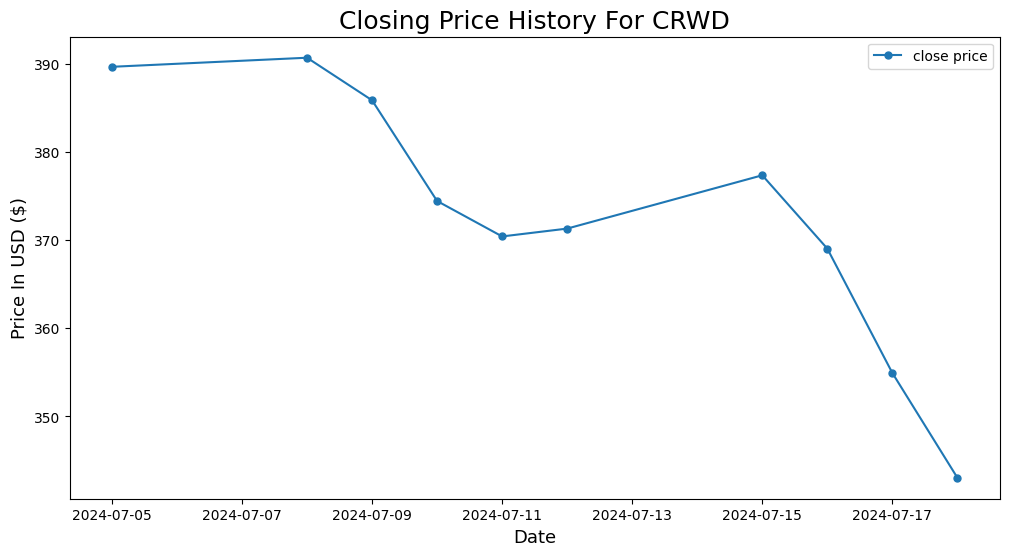

In [114]:
#visualize the closing price
plt.figure(figsize=(12,6))
plt.title('Closing Price History For CRWD', fontsize=18)
plt.plot(df2['Close'], label='close price', marker='.',markersize=10)

plt.xlabel('Date', fontsize=13)
plt.ylabel('Price In USD ($)', fontsize=13)
plt.legend()
plt.show()

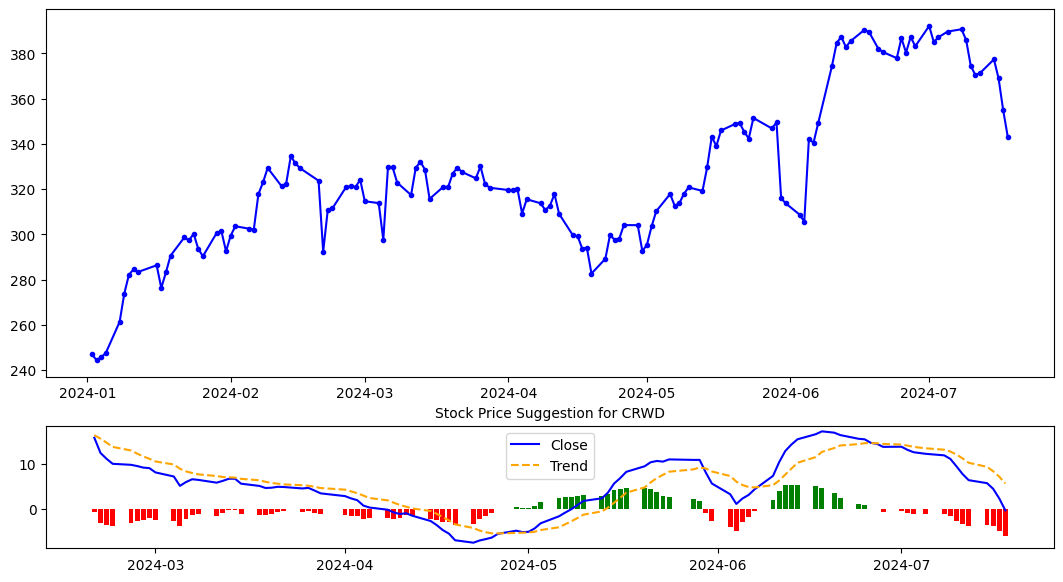

In [106]:

macd, macd_signal, macd_hist = tb.MACD(df1['Close'])

fig, axs= plt.subplots(2,1, gridspec_kw={"height_ratios": [3,1]}, figsize=(13,7))
c=["red" if c1 <0 else "green" for c1 in macd_hist]

plt.title('Stock Price Suggestion for CRWD', fontsize=10)
axs[0].plot(df1['Close'],color='blue', marker='.')
axs[1].plot(macd, 'b-',label='Close')
axs[1].plot(macd_signal, '--', color='orange',label='Trend')
axs[1].bar(macd_hist.index, macd_hist, color=c)

plt.legend()
plt.show()